# Search problem: Beijing Subway

## 1.Python Crawler: Beijing Subway

In [1]:
import requests, re, urllib.request

In [2]:
def get_reponse_TEXT(url):
    """
    获取url连接中的页面信息TEXT
    """

    headers = {"User-Agent": "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    reponse = requests.get(url, headers=headers, allow_redirects=False)
    reponse.encoding = reponse.apparent_encoding
    return reponse.text

In [3]:
def find_target(target, string):
    """
    在string中获取所有符合正则表达式target的字符的集合（有重复字符）
    """

    re_compile = re.compile(target)
    result = re_compile.findall(string)
    return result

In [4]:
def find_name(name, string):
    """
    在string中获取第一个符合正则表达式name的字符串
    """
    return re.search(name, string)

In [5]:
def find_Chinese_or_digits(word):
    """
    对爬取得到的字符进行处理，如： '>3号航站楼站</'  ->  '3号航站楼站'
    """
    return ''.join(ch for ch in word if (('\u4e00' <= ch <= '\u9fff') or ch.isdigit()))

In [6]:
def find_table(text):
    """
    获取网页中车站信息列表
    """
    start = -1
    if text.find('车站列表</caption>') > 0:
        start = text.find('车站列表</caption>')
    elif text.find('车站列表</h3>') > 0:
        start = text.find('车站列表</h3>')
    elif text.find('车站列表<br/>') > 0:
        start = text.find('车站列表<br/>')
    elif text.find('车站信息</caption>') > 0:
        start = text.find('车站信息</caption>')
    elif text.find('车站信息</h3>') > 0:
        start = text.find('车站信息</h3>')

    end = start + text[start:].find('</table>')
    table = text[start:end]

    if '车站名称' in table:
        return table
    else:
        return find_table(text[start + 1:])  ##个别网页，《车站列表》下会有几个表格，前几个表格可能是无关信息，需舍去。

In [7]:
def get_line(url):
    """
    获取某条线路网页中的车站信息
    """
    TEXT = get_reponse_TEXT(url)

    linename = find_name('<title>北京地铁\w*线', TEXT).group()

    table = find_table(TEXT)

    line_pri = find_target('>\d*[\u4e00-\u9fa5]+站</', table)

    line = [find_Chinese_or_digits(entry) for entry in line_pri]
    linename = find_Chinese_or_digits(linename)
    return line, linename

In [8]:
def get_line_station_dict(url_source, target_source):
    reponse_text = get_reponse_TEXT(url_source)

    set_url_line = set(find_target(target_source, reponse_text))
    list_url_line = ['https://baike.baidu.com' + entry for entry in set_url_line]
    list_url_line.remove(
        'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E8%A5%BF%E9%83%8A%E7%BA%BF'
    )  ##北京西郊线，网页无法爬取，故不作计算

    dict_line = {}
    i = 0

    for line_url in list_url_line:
        print(line_url)
        temp_line, temp_linename = get_line(line_url)
        i += 1

        if len(temp_line) > 0:
            dict_line[temp_linename] = temp_line
            print('linename= {}  ,success! i= {}'.format(temp_linename, i))
        else:
            print('linename= {}  ,defeated! i= {}'.format(temp_linename, i))

    return dict_line

In [9]:
##源网站url
url_source = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
##各地铁线网页url正则表达式匹配符
target_source = '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81\w*%E\d+.?\w*.?\w*.?E?\d*.?\w*.?\w*.?\w*%BA%BF'

In [10]:
dict_line = {}
dict_line = get_line_station_dict(url_source, target_source)

https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF
linename= 北京地铁16号线  ,success! i= 1
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF
linename= 北京地铁14号线  ,success! i= 2
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E7%87%95%E6%88%BF%E7%BA%BF
linename= 北京地铁燕房线  ,success! i= 3
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF
linename= 北京地铁机场线  ,success! i= 4
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF
linename= 北京地铁昌平线  ,success! i= 5
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF
linename= 北京地铁2号线  ,success! i= 6
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF
linename= 北京地铁5号线  ,success! i= 7
https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF
linename= 北京地铁13号线  ,success! i= 8
https://baike.baid

In [11]:
len(dict_line)

21

## 2.Search the optimal route 

### 不考虑每一站距离大小，仅根据 过站数 及 换线次数 ，寻找最优路径

In [12]:
import collections

In [13]:
def is_goal(destation, by_way):
    """
    判断是否达到目标
    """
    
    def is_goal_(path):
        station, _, _, _ = path[-1]
        if station == destation:
            i = 0
            n = len(by_way)
            if i == n: return True
            
            path_state = path[::2]
            
            for state in path_state:
                if state[0] in by_way: i += 1
                if i == n: return True
        return False
    
    return is_goal_

In [14]:
def double(list_example):
    return [list_example[i:i+2] for i in range(len(list_example)-1)]

def subways(lines):
        dict_successors = collections.defaultdict(dict)
        for linename, stations in lines.items():
            for a, b in double(stations):
                dict_successors[a][b] = linename
                dict_successors[b][a] = linename
        return dict_successors

def successors(state):
    """
    给出此状态下所有可能动作，及动作结果
    """
    station, linename, changelinetimes, changestoptimes = state
    result = []
    for stop, lname in dict_successors[station].items():
        action = ' -> '.join([linename, lname])
        if lname != linename:
            result.append((action, (stop, lname, changelinetimes+1, changestoptimes+1)))
        else:
            result.append((action, (stop, linename, changelinetimes, changestoptimes+1)))
    return result

In [15]:
def comparison(path):
    """
    给出路径比较规则
    """
    _, _, changelinetimes, changestoptimes = path[-1]

    return (2*changelinetimes + changestoptimes)          ##换一次线路大致等于走过两站

In [16]:
def Search(state_start, is_goal, successors, comparison):
    paths = [[state_start]]
    seen = []
    while paths:
        path = paths.pop(0)
        state_now = path[-1]
        if is_goal(path):
#             for i in paths:
#                 if is_goal(i):print(i)
            return path
        seen.append(state_now[0])
        for action, state in successors(state_now):
            if state[0] in seen:
                continue
            path_new = path + [action] + [state]
            paths.append(path_new)
        paths = sorted(paths, key=comparison, reverse = False)
    return False
    

In [17]:
dict_successors = subways(dict_line)

In [18]:
dict_successors

defaultdict(dict,
            {'宛平站': {'榆树庄站': '北京地铁16号线'},
             '榆树庄站': {'宛平站': '北京地铁16号线', '看丹站': '北京地铁16号线'},
             '看丹站': {'榆树庄站': '北京地铁16号线', '富丰桥站': '北京地铁16号线'},
             '富丰桥站': {'看丹站': '北京地铁16号线', '丰台南路站': '北京地铁16号线'},
             '丰台南路站': {'富丰桥站': '北京地铁16号线',
              '丰台站': '北京地铁16号线',
              '科怡路站': '北京地铁9号线',
              '丰台东大街站': '北京地铁9号线'},
             '丰台站': {'丰台南路站': '北京地铁16号线',
              '丰益桥南站': '北京地铁16号线',
              '首经贸站': '北京地铁10号线',
              '泥洼站': '北京地铁10号线'},
             '丰益桥南站': {'丰台站': '北京地铁16号线',
              '丽泽商务区站': '北京地铁16号线',
              '首经贸站': '北京地铁房山线'},
             '丽泽商务区站': {'丰益桥南站': '北京地铁16号线',
              '红莲南里站': '北京地铁16号线',
              '东管头站': '北京地铁14号线',
              '菜户营站': '北京地铁14号线'},
             '红莲南里站': {'丽泽商务区站': '北京地铁16号线', '达官营站': '北京地铁16号线'},
             '达官营站': {'红莲南里站': '北京地铁16号线',
              '木樨地站': '北京地铁16号线',
              '湾子站': '北京地铁7号线',
              '广安门内站': '北京地铁

In [19]:
def begin_search(state_start, destation, by_way, is_goal, successors, comparison):
    return Search(state_start, is_goal(destation, by_way), successors, comparison)

In [20]:
state_start = ('国贸站', '北京地铁1号线', 0, 0)
by_way = ['南礼士路站', '西单站']
begin_search(state_start, '国家图书馆站', by_way, is_goal, successors, comparison)

[('国贸站', '北京地铁1号线', 0, 0),
 '北京地铁1号线 -> 北京地铁1号线',
 ('永安里站', '北京地铁1号线', 0, 1),
 '北京地铁1号线 -> 北京地铁1号线',
 ('建国门站', '北京地铁1号线', 0, 2),
 '北京地铁1号线 -> 北京地铁1号线',
 ('东单站', '北京地铁1号线', 0, 3),
 '北京地铁1号线 -> 北京地铁1号线',
 ('王府井站', '北京地铁1号线', 0, 4),
 '北京地铁1号线 -> 北京地铁1号线',
 ('天安门东站', '北京地铁1号线', 0, 5),
 '北京地铁1号线 -> 北京地铁1号线',
 ('天安门西站', '北京地铁1号线', 0, 6),
 '北京地铁1号线 -> 北京地铁1号线',
 ('西单站', '北京地铁1号线', 0, 7),
 '北京地铁1号线 -> 北京地铁1号线',
 ('复兴门站', '北京地铁1号线', 0, 8),
 '北京地铁1号线 -> 北京地铁1号线',
 ('南礼士路站', '北京地铁1号线', 0, 9),
 '北京地铁1号线 -> 北京地铁1号线',
 ('木樨地站', '北京地铁1号线', 0, 10),
 '北京地铁1号线 -> 北京地铁1号线',
 ('军事博物馆站', '北京地铁1号线', 0, 11),
 '北京地铁1号线 -> 北京地铁9号线',
 ('白堆子站', '北京地铁9号线', 1, 12),
 '北京地铁9号线 -> 北京地铁9号线',
 ('白石桥南站', '北京地铁9号线', 1, 13),
 '北京地铁9号线 -> 北京地铁9号线',
 ('国家图书馆站', '北京地铁9号线', 1, 14)]

## 3.Draw a picture with chinese label

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
def get_subway_connection(lines):
        dict_successors = collections.defaultdict(list)
        for _, stations in lines.items():
            for a, b in double(stations):
                dict_successors[a].append(b)
                dict_successors[b].append(a)
        return dict_successors

In [23]:
stations = get_subway_connection(dict_line)

In [24]:
g = nx.Graph(stations)

In [25]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


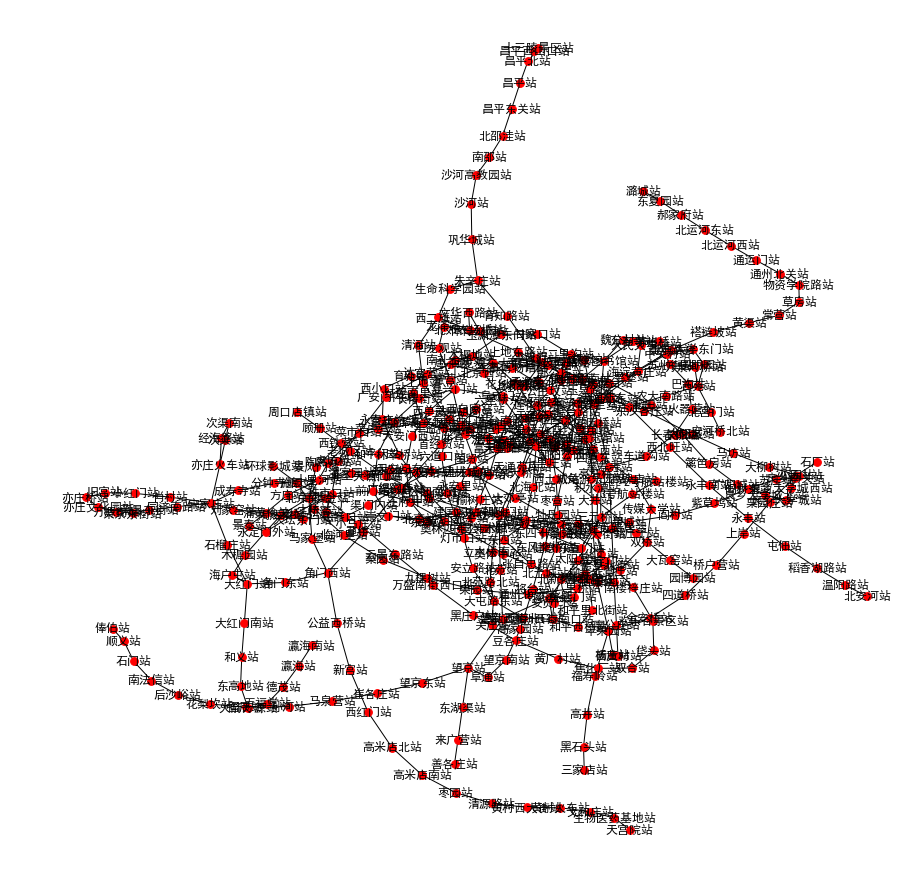

In [26]:
plt.figure(1,figsize=(12,12)) 
nx.draw(g, node_size=60, font_size=12, with_labels=True)
plt.show()